In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [23]:
data_files = {
    "nosein_mouthout_1": "./sensor_data_nosein_mouthout_1_with_anomalies.csv",
    "nosein_noseout_1": "./sensor_data_nosein_noseout_1_with_anomalies.csv"
}

recording_start_lines = {
    "nosein_mouthout_1": 3893,
    "nosein_noseout_1": 90
}

anomaly_intervals_dict = {
    "nosein_mouthout_1": [
        (5978, 6699),  # 1 anomaly interval
        (7580, 8046),  # 2 anomaly interval 
        (9204, 9674),  # 3 anomaly interval
        (11292, 11595) # 4 anomaly interval
    ],
    "nosein_noseout_1": [
        (772, 1260),  # 1 anomaly interval
        (1960, 2180),  # 2 anomaly interval 
        (2560, 2810),  # 3 anomaly interval
        (3670, 4090), # 4 anomaly interval
        (5112, 5230), # 5 anomaly interval
        (6090, 6310), # 6 anomaly interval
        (6792, 7039) # 7 anomaly interval
    ]
}


In [24]:

datafile = data_files["nosein_noseout_1"]
recording_start_line = recording_start_lines["nosein_noseout_1"]
# Anomaly intervals (start_line, end_line)
anomaly_intervals = anomaly_intervals_dict["nosein_noseout_1"]


anomalies = []
adj_anomaly_intervals = []

with open(datafile) as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    next(readCSV)  # Skip the header row
    rows = list(readCSV)
    # print(rows)
    # Start from line recording_start_line where valid readings begin
    valid_rows = rows[recording_start_line:]
    
    # Extract timestamps for each anomaly interval
    for start_line, end_line in anomaly_intervals:
        # Adjust indices to account for the recording_start_line offset
        adj_start = start_line - recording_start_line
        adj_end = end_line - recording_start_line   
        adj_anomaly_intervals.append((adj_start, adj_end))

        # Extract timestamps between start and end lines
        for i in range(adj_start, adj_end + 1):
            if i < len(valid_rows):
                timestamp = valid_rows[i][0]  # Get timestamp from first column
                anomalies.append(timestamp)
                
print("adj_anomaly_intervals:", adj_anomaly_intervals)
print("Anomaly timestamps extracted:")
print(anomalies)
np_anomalies = np.asarray(anomalies)
print(np_anomalies)
print(np_anomalies.shape)


adj_anomaly_intervals: [(682, 1170), (1870, 2090), (2470, 2720), (3580, 4000), (5022, 5140), (6000, 6220), (6702, 6949)]
Anomaly timestamps extracted:
['2025-02-20 23:55:17', '2025-02-20 23:55:17', '2025-02-20 23:55:17', '2025-02-20 23:55:17', '2025-02-20 23:55:17', '2025-02-20 23:55:17', '2025-02-20 23:55:17', '2025-02-20 23:55:17', '2025-02-20 23:55:17', '2025-02-20 23:55:17', '2025-02-20 23:55:17', '2025-02-20 23:55:17', '2025-02-20 23:55:17', '2025-02-20 23:55:17', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18', '2025-02-20 23:55:18

In [25]:
print(np.asarray(valid_rows).shape)

(7319, 7)


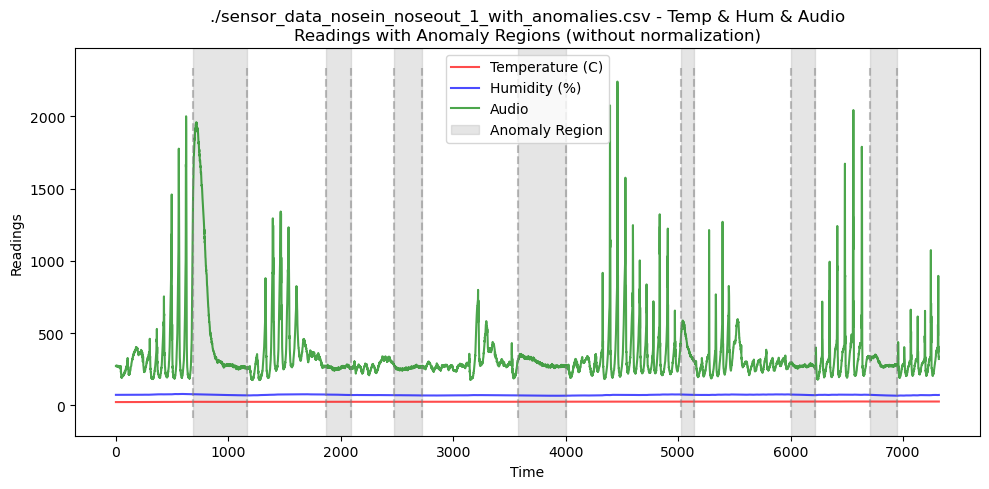

In [26]:
# Plot the data
t = []
temp_readings = []
hum_readings = []
audio_readings = []

for i, row in enumerate(valid_rows):
    if i > 0:  # Skip header
        t.append(i)
        audio_readings.append(float(row[1]))
        temp_readings.append(float(row[2]))
        hum_readings.append(float(row[3]))

t = np.asarray(t)
temp_readings = np.asarray(temp_readings)
hum_readings = np.asarray(hum_readings)
audio_readings = np.asarray(audio_readings)
# print(temp_readings.shape)

plt.figure(figsize=(10, 5))

# Plot temperature and humidity readings
plt.plot(t, temp_readings, label='Temperature (C)', color='red', alpha=0.7)
plt.plot(t, hum_readings, label='Humidity (%)', color='blue', alpha=0.7)
plt.plot(t, audio_readings, label='Audio', color='green', alpha=0.7)

# Plot vertical lines for anomalies
y_min, y_max = plt.ylim()
for adj_start, adj_end in adj_anomaly_intervals:
    # Plot vertical lines at start and end of anomaly intervals
    plt.vlines(x=adj_start, ymin=y_min, ymax=y_max, colors='gray', linestyles='dashed', alpha=0.5)
    plt.vlines(x=adj_end, ymin=y_min, ymax=y_max, colors='gray', linestyles='dashed', alpha=0.5)
    
    # Fill the anomaly region
    plt.axvspan(adj_start, adj_end, color='gray', alpha=0.2, label="Anomaly Region" if adj_start == adj_anomaly_intervals[0][0] else "")

plt.xlabel('Time')
plt.ylabel('Readings')
plt.title(f'{datafile} - Temp & Hum & Audio\nReadings with Anomaly Regions (without normalization)')
plt.legend()
plt.tight_layout()
plt.savefig(f'{datafile}_temp_hum_audio_with_anomaly_regions_without_normalization.png')
plt.show()

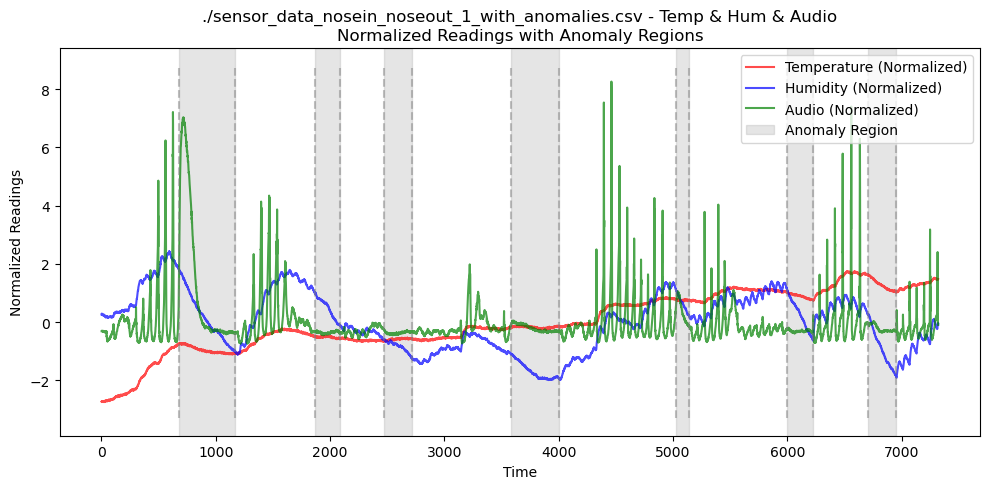

In [27]:
# Normalize the data
temp_mean = np.mean(temp_readings)
temp_std = np.std(temp_readings)
temp_normalized = (temp_readings - temp_mean) / temp_std

hum_mean = np.mean(hum_readings) 
hum_std = np.std(hum_readings)
hum_normalized = (hum_readings - hum_mean) / hum_std

audio_mean = np.mean(audio_readings)
audio_std = np.std(audio_readings)
audio_normalized = (audio_readings - audio_mean) / audio_std

plt.figure(figsize=(10, 5))

# Plot normalized readings
plt.plot(t, temp_normalized, label='Temperature (Normalized)', color='red', alpha=0.7)
plt.plot(t, hum_normalized, label='Humidity (Normalized)', color='blue', alpha=0.7)
plt.plot(t, audio_normalized, label='Audio (Normalized)', color='green', alpha=0.7)

# Plot vertical lines for anomalies
y_min, y_max = plt.ylim()
for adj_start, adj_end in adj_anomaly_intervals:
    # Plot vertical lines at start and end of anomaly intervals
    plt.vlines(x=adj_start, ymin=y_min, ymax=y_max, colors='gray', linestyles='dashed', alpha=0.5)
    plt.vlines(x=adj_end, ymin=y_min, ymax=y_max, colors='gray', linestyles='dashed', alpha=0.5)
    
    # Fill the anomaly region
    plt.axvspan(adj_start, adj_end, color='gray', alpha=0.2, label="Anomaly Region" if adj_start == adj_anomaly_intervals[0][0] else "")

plt.xlabel('Time')
plt.ylabel('Normalized Readings')
plt.title(f'{datafile} - Temp & Hum & Audio\nNormalized Readings with Anomaly Regions')
plt.legend()
plt.tight_layout()
plt.savefig(f'{datafile}_temp_hum_audio_with_anomaly_regions_normalized.png')
plt.show()
